In [1]:
import os
import torch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import torch.nn as nn
import sys
from utils import *

In [2]:
sys.path.insert(0, '/sdf/data/ad/ard/u/zihanzhu/code_dev/cheetah/')
import cheetah

## Get lattice from Bmad into Cheetah

#### Load lattice from bmad

In [3]:
# cu_hxr_file_path = (
#     Path("$LCLS_LATTICE") / "bmad" / "models" / "cu_hxr" / "cu_hxr.lat.bmad"
# )
BEAMPATH = "cu_hxr/cu_hxr.lat.bmad"
cu_hxr_file_path = f'$LCLS_LATTICE/bmad/models/{BEAMPATH}'
lcls_lattice_dir = os.environ["LCLS_LATTICE"]
lcls_cu_segment = (
    cheetah.Segment.from_bmad(
    str(cu_hxr_file_path),
    environment_variables={"LCLS_LATTICE": lcls_lattice_dir},
    dtype=torch.float64,
))

In [4]:
lcls_cu_segment = lcls_cu_segment.flattened()
len(lcls_cu_segment.elements)

2263

## Bmad

In [5]:
from pytao import Tao
import pandas as pd
from util_bmad import tc, get_output, print_twiss

In [6]:
def tc(cmd, verbose: bool = False):
    result = tao.cmd(cmd)
    if verbose:
        for l in result:
            print(l)

In [7]:
track_start_element_name = 'otr3'#'otr3'#'endl1'#'beginning'#'begltuh' #'begbsyh_1' #'begl3'
track_end_element_name = 'endltuh' #'endltuh'#'end' #'endclth_0'

In [8]:
#CU_HXR model
BEAMPATH = 'cu_hxr'
# OPTIONS = f'-slice {track_start_element_name}:{track_end_element_name} -noplot '
# OPTIONS = f'-slice {track_start_element_name}: -noplot '
OPTIONS = f'-slice beg:end -noplot '
INIT = f'-init $LCLS_LATTICE/bmad/models/{BEAMPATH}/tao.init {OPTIONS}'
tao = Tao(INIT)
#tc('set ele  *::BEGUNDH:ENDUNDH  field_master=True') #QHXHs
# tc('set ele BEGINNING:END field_master=True')

bmad_output = get_output(tao)

In [10]:
floorplan=pd.read_csv(io.StringIO('\n'.join(tao.show('lat -all -floor_coords -tracking_elements')[3:-5])), sep="[\s\n]+",engine='python',
            names=['Index','ElementName','ElementType','s','ds','X','Y','Z','Theta','Phi','Psi'])
floorplan.drop(0,inplace=True)

In [10]:
e_collimators_eles = floorplan[floorplan['ElementType']=='ECollimator']['ElementName'].tolist()
print(e_collimators_eles)
r_collimators_eles = floorplan[floorplan['ElementType']=='RCollimator']['ElementName'].tolist()
print(r_collimators_eles)
sbend_collimators_eles = floorplan[floorplan['ElementType']=='SBend']['ElementName'].tolist()
print(sbend_collimators_eles)

['PCAPM1', 'PCAPM2', 'PCAPM3', 'PCAPM4', 'PC90', 'PC119', 'PCTDKIK1', 'PCTDKIK2', 'PCTDKIK3', 'PCTDKIK4', 'PCMUON', 'PCTCX', 'PCPM0', 'PCPM1L', 'PCPM2L', 'PCEBD']
['CE11', 'CE21', 'C29096', 'C29146', 'C29446', 'C29546', 'C29956', 'C30146', 'C30446', 'C30546', 'CXQ6', 'CEDL1', 'CYBX32', 'CXQT22', 'CEDL3', 'CYBX36']
['BXH1', 'BXH2', 'BXH3', 'BXH4', 'BX01', 'BX02', 'BX11', 'BX12', 'BX13', 'BX14', 'BX21', 'BX22', 'BX23', 'BX24', 'BY1', 'BY2', 'BX31', 'BX32', 'BCX321', 'BCX322', 'BCX323', 'BCX324', 'BYKIK1', 'BYKIK2', 'BCX351', 'BCX352', 'BCX353', 'BCX354', 'BX35', 'BX36', 'BCX361', 'BCX362', 'BCX363', 'BCX364', 'BCXCBX11', 'BCXCBX12', 'BCXCBX13', 'BCXCBX14', 'BCXCBX21', 'BCXCBX22', 'BCXCBX23', 'BCXCBX24', 'BCXHS1', 'BCXHS2', 'BCXHS3', 'BCXHS4', 'BYDSH', 'BYD1', 'BYD2', 'BYD3']


In [11]:
# Convert 'ElementName' column to a set for faster lookup
floorplan_elements = set(floorplan['ElementName'])

# Check if each element in bmad_output['ele.name'] exists in floorplan['ElementName']
for ele in bmad_output['ele.name']:
    if ele in floorplan_elements:
        pass
        # print(f"{ele} exists in floorplan.")
    else:
        print(f"{ele} does not exist in floorplan.")

BEGINNING does not exist in floorplan.
ENDDMPH_2 does not exist in floorplan.
END does not exist in floorplan.


In [13]:
tc('show lat -s 1450:1470', verbose=True) 

# Values shown are for the Downstream End of each Element:
# Index  name      key                       s       l    beta   phi_a    eta   orbit    beta   phi_b    eta   orbit  Track
#                                                            a   [2pi]      x  x [mm]       b   [2pi]      y  y [mm]  State
   1996  DE3M80CMB Drift              1453.281   7.906   67.39  11.755  -0.00   0.000   31.69   9.508  -0.00   0.000  Alive
   1997  XCE33     HKicker            1453.281   0.000   67.39  11.755  -0.00   0.000   31.69   9.508  -0.00   0.000  Alive
   1998  DQEAB     Drift              1453.737   0.456   68.72  11.756  -0.00   0.000   31.06   9.510  -0.00   0.000  Alive
   1999  QE33#1    Quadrupole         1453.791   0.054   68.80  11.756  -0.00   0.000   31.02   9.511  -0.00   0.000  Alive
   2000  BPME33    Monitor            1453.791   0.000   68.80  11.756  -0.00   0.000   31.02   9.511  -0.00   0.000  Alive
   2001  QE33#2    Quadrupole         1453.845   0.054   68.72  11.756  -

## LCLS-Live setup


In [16]:
sys.path.append(os.path.abspath("/sdf/data/ad/ard/u/zihanzhu/lcls/lcls-live/"))

from lcls_live.datamaps import get_datamaps
from lcls_live.archiver import lcls_archiver_restore
from lcls_live import data_dir

In [17]:
from util_bmad import (bdesToKmod, get_pvlist, get_bmad, get_tao,  get_tao_dm, get_live, get_pvlist_rf, evaluate_tao,  
make_cmds, getEtot,  print_twiss, bmag, calc_bmag, view, fudge_L1_cmds, fudge_L2_cmds, fudge_L3_cmds, outkeys, 
showemit, get_output, plot_twiss, use_LI21, use_BC2, use_BEGL3, use_LI28, use_LTUH_M, match_init_cmds, match_final_cmds, 
init_cmds, final_cmds, plot_betas)

In [18]:
ALL_DATAMAPS = get_datamaps('cu_hxr')
del ALL_DATAMAPS['bpms']
del ALL_DATAMAPS['correctors']
PV_LIST = get_pvlist(ALL_DATAMAPS)
RF_PVS, LINAC_MAGNET_PVS, LTU_MAGNET_PVS = get_pvlist_rf(ALL_DATAMAPS)

/sdf/data/ad/ard/u/zihanzhu/lcls/lcls-live/lcls_live/datamaps/__init__.py:38: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_json(d.pop('data'))
/sdf/data/ad/ard/u/zihanzhu/lcls/lcls-live/lcls_live/datamaps/__init__.py:38: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_json(d.pop('data'))
/sdf/data/ad/ard/u/zihanzhu/lcls/lcls-live/lcls_live/datamaps/__init__.py:38: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_json(d.pop('data'))
/sdf/data/ad/ard/u/zihanzhu/lcls/lcls-live/lcls_live/datamaps/__init__.py:38: FutureWarning: Passing literal json to 'read_json' is deprecated and w

In [19]:
time_data = '2024-09-26T14:44:39.000000-07:00'

In [20]:
pvdata= lcls_archiver_restore(PV_LIST, time_data)
rf_pvdata =  lcls_archiver_restore(RF_PVS, time_data)
linac_magnets_pvdata =  lcls_archiver_restore(LINAC_MAGNET_PVS, time_data)


tao_cmds = get_tao(pvdata, ALL_DATAMAPS)
MAGNET_DATAMAP = { 'quad': ALL_DATAMAPS['quad']}
#linac_magnets_tao_cmds = get_tao(linac_magnets_pvdata, ALL_DATAMAPS)

Requesting: http://lcls-archapp.slac.stanford.edu/retrieval/data/getDataAtTime?at=2024-09-26T14:44:39.000000-07:00&includeProxies=true
Requesting: http://lcls-archapp.slac.stanford.edu/retrieval/data/getDataAtTime?at=2024-09-26T14:44:39.000000-07:00&includeProxies=true
Requesting: http://lcls-archapp.slac.stanford.edu/retrieval/data/getDataAtTime?at=2024-09-26T14:44:39.000000-07:00&includeProxies=true


In [21]:
for cmd in tao_cmds:
    tc(cmd)

### Load the measurement data

In [24]:
run_df = pd.read_pickle('/sdf/data/ad/ard/u/zihanzhu/lcls/lcls-live/26SEP2024_emittance_data.pd.pkl')
run_df

,YAGS:LTUH:743:BETA_X,YAGS:LTUH:743:ALPHA_X,YAGS:LTUH:743:EMITN_X,YAGS:LTUH:743:BETA_Y,YAGS:LTUH:743:ALPHA_Y,YAGS:LTUH:743:EMITN_Y,OTRS:IN20:621:BETA_X,OTRS:IN20:621:ALPHA_X,OTRS:IN20:621:EMITN_X,OTRS:IN20:621:BETA_Y,OTRS:IN20:621:ALPHA_Y,OTRS:IN20:621:EMITN_Y
datetime,,,,,,,,,,,,
2024-09-09 16:51:54.862340352-07:00,0.002596,0.001242,36644.208158,59.380929,-1.448258,1.565377,2.508668,-0.753167,0.511055,3.851856,-0.776802,0.448987
2024-09-09 16:51:54.862341120-07:00,0.002596,0.001242,36644.208158,59.380929,-1.448258,1.565377,2.508668,-0.753167,0.511055,3.851856,-0.776802,0.448987
2024-09-09 16:51:54.862341376-07:00,0.002596,0.001242,36644.208158,59.380929,-1.448258,1.565377,2.508668,-0.753167,0.511055,3.851856,-0.776802,0.448987
2024-09-09 16:51:54.862342144-07:00,0.002596,0.001242,36644.208158,59.380929,-1.448258,1.565377,2.508668,-0.753167,0.511055,3.851856,-0.776802,0.448987
2024-09-09 16:51:54.862342912-07:00,0.002596,0.001242,36644.208158,59.380929,-1.448258,1.565377,2.508668,-0.753167,0.511055,3.851856,-0.776802,0.448987
2024-09-09 16:51:54.862343424-07:00,0.002596,0.001242,36644.208158,59.380929,-1.448258,1.565377,2.508668,-0.753167,0.511055,3.851856,-0.776802,0.448987
2024-09-26 08:08:02.589769728-07:00,0.002596,0.001242,36644.208158,59.380929,-1.448258,1.565377,2.508668,-0.753167,0.511055,3.851856,-0.776802,0.448987
2024-09-26 08:08:02.589795328-07:00,0.002596,0.001242,36644.208158,59.380929,-1.448258,1.565377,2.508668,-0.753167,0.511055,3.851856,-0.776802,0.448987
2024-09-26 08:08:02.589801984-07:00,0.002596,0.001242,36644.208158,59.380929,-1.448258,1.565377,2.508668,-0.753167,0.511055,3.851856,-0.776802,0.448987


In [25]:
def set_otr3_target(index: int, name: str, meas_value: float):
    if 'beta' in name:
        weight = 1e1
    elif 'alpha' in name:
        weight = 1e2
    else:
        weight = 0e0
    tao.cmd(f'set data -silent OTR3.twiss[{index}]|data_source = lat')
    tao.cmd(f'set data -silent OTR3.twiss[{index}]|ele_name = OTR3')
    tao.cmd(f'set data -silent OTR3.twiss[{index}]|merit_type = target')
    tao.cmd(f'set data -silent OTR3.twiss[{index}]|data_type = {name}')
    tao.cmd(f'set data -silent OTR3.twiss[{index}]|weight = {weight}')
    tao.cmd(f'set data OTR3.twiss[{index}]|meas = {meas_value}')

def configure_otr3_targets(series: pd.Series):
    pv_stem = 'OTRS:IN20:621'
    config_vars = {
        'beta.a': 'BETA_X',
        'alpha.a': 'ALPHA_X',
        'beta.b': 'BETA_Y',
        'alpha.b': 'ALPHA_Y',
        'eta.x': 'ETA_X',
        'etap.x': 'ETAP_X',
    }
    for i, (key, value) in enumerate(config_vars.items()):
        full_name = ':'.join([pv_stem, value])
        try:
            v = series[full_name]
        except KeyError:  # doesn't exist
            v = 0.
        set_otr3_target(i + 1, key, v)
    

In [26]:
tao.cmd('set global lattice_calc_on = F')

try:
    tao.data_d2_destroy('OTR3')
except RuntimeError:
    pass  # it doesn't exist

tao.data_d2_create(
    d2_name='OTR3',
    n_d1_data=1,
    d_data_arrays_name_min_max='twiss^^1^^6',
    verbose=True
)

configure_otr3_targets(run_df.iloc[-1])

# tao.cmd('set data -silent OTR3.twiss[1]|data_source = lat')
# tao.cmd('set data -silent OTR3.twiss[1]|ele_name = OTR3')
# tao.cmd('set data -silent OTR3.twiss[1]|merit_type = target')
# tao.cmd('set data -silent OTR3.twiss[1]|data_type = beta.a')
# tao.cmd('set data OTR3.twiss[1]|meas = 69.420')


tao.cmd('set global lattice_calc_on = T')

python data_d2_create @OTR3^^1^^twiss^^1^^6


[]

In [27]:
tc('show data OTR3.twiss', True)

Data name: OTR3.twiss
                                                                                                        |   Useit
                         Ref_Ele   Start_Ele   Ele                 Meas           Model          Design | Opt  Plot
    1  beta.a <target>                         OTR3       2.5086681E+00   2.8309071E+01   4.6828005E+00     T     F
    2  alpha.a <target>                        OTR3      -7.5316748E-01  -1.6072628E+00  -1.7963654E+00     T     F
    3  beta.b <target>                         OTR3       3.8518559E+00   2.6634365E+01   4.6887277E+00     T     F
    4  alpha.b <target>                        OTR3      -7.7680232E-01  -6.2040921E+00  -1.7981431E+00     T     F
    5  eta.x <target>                          OTR3       0.0000000E+00  -5.2413817E-17  -4.0097326E-16     T     F
    6  etap.x <target>                         OTR3       0.0000000E+00  -3.9235274E-17  -6.8754300E-17     T     F
                         Ref_Ele   Start_Ele   Ele  

In [28]:
all_cmds = match_init_cmds + ['use dat OTR3.twiss[1:4]'] + match_final_cmds
# all_cmds = match_init_cmds + ['use dat OTR3.twiss[1:4]'] + match_final_cmds

for cmd in all_cmds:
    tao.cmd(cmd)

In [29]:
tao.ele_twiss('OTR3', which='model')

{'mode_flip': False,
 'beta_a': 2.5086680889673,
 'alpha_a': -0.753167483636558,
 'gamma_a': 0.624738388190919,
 'phi_a': 5.084606109557,
 'eta_a': -5.24138166572963e-17,
 'etap_a': -3.92352735923028e-17,
 'beta_b': 3.85185591656464,
 'alpha_b': -0.77680231656508,
 'gamma_b': 0.416272538161531,
 'phi_b': 7.70333385285771,
 'eta_b': 0.0,
 'etap_b': 0.0,
 'eta_x': -5.24138166572963e-17,
 'etap_x': -3.92352735923028e-17,
 'eta_y': 0.0,
 'etap_y': 0.0}

In [30]:
bmad_output = get_output(tao)

#### Bmad vs Cheetah

In [31]:
for element in lcls_cu_segment.elements:
    if isinstance(element, cheetah.Cavity):
        phase_value = list(tao.ele_param(element.name, 'ele.PHI0').values())[0]
        element.phase = torch.tensor([phase_value*360], dtype=torch.float64)
        voltage = list(tao.ele_param(element.name, 'ele.VOLTAGE').values())[0]
        element.voltage = torch.tensor([voltage], dtype=torch.float64)
    if isinstance(element, cheetah.Quadrupole):
        k1_value = list(tao.ele_param(element.name, 'ele.k1').values())[0]
        element.k1 = torch.tensor([k1_value], dtype=torch.float64)

## Cheetah 

In [182]:
def find_element_index_by_name(module_list, name):
    name_lower = name.lower()
    for idx, element in enumerate(module_list):
        if hasattr(element, 'name') and element.name.lower() == name_lower:
            print(f"Element '{element.name}' found at index: {idx}")
            return idx
    return -1  # If not found


In [183]:
def get_cheetah_beam_values(segment, beam):
    """Get twiss parameter evolution along the segment."""
    longitudinal_beams = [beam]
    s_positions = [torch.tensor([0.0])]
    ele_name = []
    for element in segment.elements:
        # if element.length == 0:
            # continue

        outgoing = element.track(longitudinal_beams[-1])
        ele_name.append(element.name)
        longitudinal_beams.append(outgoing)
        s_positions.append(s_positions[-1] + element.length)

    results = {
        's': s_positions,
        'beta_x': [beam.beta_x for beam in longitudinal_beams],
        'beta_y': [beam.beta_y for beam in longitudinal_beams],
        'alpha_x': [beam.alpha_x for beam in longitudinal_beams],
        'alpha_y': [beam.alpha_y for beam in longitudinal_beams],
        'sigma_t': [beam.sigma_tau for beam in longitudinal_beams],
        'energy': [beam.energy for beam in longitudinal_beams],
        'mu_x': [beam.mu_x for beam in longitudinal_beams],
        'mu_y': [beam.mu_y for beam in longitudinal_beams],
        'emit_x': [beam.emittance_x for beam in longitudinal_beams],
        'emit_y': [beam.emittance_y for beam in longitudinal_beams],
        'ele_name': ele_name
    }
    
    return results

In [184]:
cheetah_start_index = find_element_index_by_name(lcls_cu_segment.elements, track_start_element_name)
cheetah_end_index = find_element_index_by_name(lcls_cu_segment.elements, track_end_element_name)

Element 'otr3' found at index: 109
Element 'endltuh' found at index: 1497


In [185]:
name_array = np.array(bmad_output['ele.name'])

bmad_start_index = np.where(name_array == track_start_element_name.upper())[0]
# print(bmad_start_index)
bmad_end_index = np.where(name_array == track_end_element_name.upper())[0]
# print(bmad_end_index)
x_beta = bmad_output['ele.a.beta'][bmad_start_index[0]]
x_alpha = bmad_output['ele.a.alpha'][bmad_start_index[0]]
y_beta = bmad_output['ele.b.beta'][bmad_start_index[0]]
y_alpha = bmad_output['ele.b.alpha'][bmad_start_index[0]]
beam_energy = bmad_output['ele.e_tot'][bmad_start_index[0]]
print(f'Twiss parameters of the element {track_start_element_name}:')
print(f'x_beta: {x_beta}, x_alpha:{x_alpha}\ny_beta: {y_beta}, y_alpha:{y_alpha}\nE_tot:{beam_energy}')

Twiss parameters of the element otr3:
x_beta: 2.5086680889673008, x_alpha:-0.7531674836365577
y_beta: 3.851855916564639, y_alpha:-0.7768023165650799
E_tot:135000000.00000042


### Defining beam using ParameterBeam

In [186]:
# beta_x =  5.91253676811641 # 10.853101620922  #17.2
# alpha_x = 3.5563130763366 # -0.939865510500633
emittance_x =  1e-06 #3.3523564244172698e-09

# beta_y = 5.91253676811641 #71.0120272732478 #17.2
# alpha_y =  3.5563130763366 # 2.20654881 #-4.8
emittance_y =  1e-06 #3.5209667036341894e-09
# beam_energy = 5e9


design_incoming = cheetah.ParameterBeam.from_twiss(
    beta_x=torch.tensor([x_beta]),
    alpha_x=torch.tensor([x_alpha]),
    emittance_x=torch.tensor([emittance_x]),
    beta_y=torch.tensor([y_beta]),
    alpha_y=torch.tensor([y_alpha]),
    emittance_y=torch.tensor([emittance_y]),
    energy=torch.tensor([beam_energy]),
    dtype=torch.float64,
)

print(design_incoming)
print(f'x_beta: {design_incoming.beta_x}, x_alpha:{design_incoming.alpha_x}\ny_beta: {design_incoming.beta_y}, y_alpha:{design_incoming.alpha_y}')

ParameterBeam(mu_x=tensor(0., dtype=torch.float64), mu_px=tensor(0., dtype=torch.float64), mu_y=tensor(0., dtype=torch.float64), mu_py=tensor(0., dtype=torch.float64), sigma_x=tensor([0.0016], dtype=torch.float64), sigma_px=tensor([0.0008], dtype=torch.float64), sigma_y=tensor([0.0020], dtype=torch.float64), sigma_py=tensor([0.0006], dtype=torch.float64), sigma_tau=tensor([1.0000e-06], dtype=torch.float64), sigma_p=tensor([1.0000e-06], dtype=torch.float64), energy=tensor([1.3500e+08], dtype=torch.float64)), total_charge=tensor([0.], dtype=torch.float64))
x_beta: tensor([2.5087], dtype=torch.float64), x_alpha:tensor([-0.7532], dtype=torch.float64)
y_beta: tensor([3.8519], dtype=torch.float64), y_alpha:tensor([-0.7768], dtype=torch.float64)


### Defining beam using ParticleBeam

In [76]:
# x_beta =  10.853101620922004 
# x_alpha = -0.9398655105006327 
emittance_x =  1e-06 

# y_beta = 71.01202727324782 
# y_alpha =  2.206548806306204 
emittance_y =  1e-06 
# beam_energy = 5e9

num_particles = 10_000 #100_000
total_charge = 250e-12

design_incoming = cheetah.ParticleBeam.from_twiss(
    num_particles=torch.tensor(num_particles),
    beta_x=torch.tensor([x_beta]),
    alpha_x=torch.tensor([x_alpha]),
    emittance_x=torch.tensor([emittance_x]),
    beta_y=torch.tensor([y_beta]),
    alpha_y=torch.tensor([y_alpha]),
    emittance_y=torch.tensor([emittance_y]),
    energy=torch.tensor([beam_energy]),
    total_charge=torch.tensor([total_charge]),
    dtype=torch.float64,
)
# design_incoming = design_incoming.double()
print(design_incoming)
print(f'x_beta: {design_incoming.beta_x}, x_alpha:{design_incoming.alpha_x}\ny_beta: {design_incoming.beta_y}, y_alpha:{design_incoming.alpha_y}')

ParticleBeam(n=10000, mu_x=tensor([3.6287e-05], dtype=torch.float64), mu_px=tensor([1.5066e-05], dtype=torch.float64), mu_y=tensor([3.9064e-06], dtype=torch.float64), mu_py=tensor([-2.9144e-06], dtype=torch.float64), sigma_x=tensor([0.0016], dtype=torch.float64), sigma_px=tensor([0.0008], dtype=torch.float64), sigma_y=tensor([0.0020], dtype=torch.float64), sigma_py=tensor([0.0007], dtype=torch.float64), sigma_tau=tensor([1.0058e-06], dtype=torch.float64), sigma_p=tensor([9.9088e-07], dtype=torch.float64), energy=tensor([1.3500e+08], dtype=torch.float64)) total_charge=tensor([2.5000e-10], dtype=torch.float64))
x_beta: tensor([2.5718], dtype=torch.float64), x_alpha:tensor([-0.7788], dtype=torch.float64)
y_beta: tensor([3.8386], dtype=torch.float64), y_alpha:tensor([-0.7797], dtype=torch.float64)


### Tracking with Cheetah

In [187]:
segment_elements = lcls_cu_segment.elements[cheetah_start_index:cheetah_end_index + 1]
tracking_segment = cheetah.Segment(elements=segment_elements)

bmad_tracking = 0 # Activate bmadx tracking method 
for element in tracking_segment.elements:
    if isinstance(element, cheetah.Quadrupole) or isinstance(element, cheetah.Dipole):
        if bmad_tracking:
            element.tracking_method = "bmadx"
        else:
            element.tracking_method = "cheetah"

for element in tracking_segment.elements:
    if isinstance(element, cheetah.Aperture):
        element.is_active = False

In [188]:
outgoing_beam = tracking_segment.track(design_incoming)
print(outgoing_beam)
cheetah_output = get_cheetah_beam_values(tracking_segment, design_incoming)

ParameterBeam(mu_x=tensor([0.], dtype=torch.float64), mu_px=tensor([0.], dtype=torch.float64), mu_y=tensor([0.], dtype=torch.float64), mu_py=tensor([0.], dtype=torch.float64), sigma_x=tensor([0.0029], dtype=torch.float64), sigma_px=tensor([0.0002], dtype=torch.float64), sigma_y=tensor([6.2188e-05], dtype=torch.float64), sigma_py=tensor([0.0004], dtype=torch.float64), sigma_tau=tensor([1.0000e-10], dtype=torch.float64), sigma_p=tensor([1.0000e-06], dtype=torch.float64), energy=tensor([9.7851e+09], dtype=torch.float64)), total_charge=tensor([0.], dtype=torch.float64))


In [11]:
section_beg_eles = ['BX21','BEGBC2', 'BC2CBEG']# 'ENDBC2','BX22','BX23','BX24']#,'BEGBC2', 'BEGBSYH_1', 'BEGLTUH']
sbend_eles = floorplan[floorplan['ElementType']=='SBend']['ElementName'].tolist()
locations = []
for element in section_beg_eles:
    index = [i for i, name in enumerate(bmad_output['ele.name']) if name == element]   
    if index:
        location = bmad_output['ele.s'][index[0]]
        locations.append((element, location))
    else:
        locations.append((element, None))
locations

[('BX21', np.float64(399.26159903103047)),
 ('BEGBC2', np.float64(396.01907394178033)),
 ('BC2CBEG', np.float64(398.71247394178033))]

In [207]:
condition = (390 < s + bmad_output['ele.s'][bmad_start_index]) & (s + bmad_output['ele.s'][bmad_start_index] < 430)
matching_indices = np.where(condition)[0]
for idx in matching_indices:
    print(f"beta_x of element {cheetah_output['ele_name'][idx-1]} at s {s[idx] + bmad_output['ele.s'][bmad_start_index]}: {cheetah_output['beta_x'][idx]}")



beta_x of element k24_6c at s tensor([392.9749], dtype=torch.float64): tensor([199.8604], dtype=torch.float64)
beta_x of element k24_6d at s tensor([396.0190], dtype=torch.float64): tensor([182.6501], dtype=torch.float64)
beta_x of element li24term at s tensor([396.0190], dtype=torch.float64): tensor([182.6501], dtype=torch.float64)
beta_x of element endl2 at s tensor([396.0190], dtype=torch.float64): tensor([182.6501], dtype=torch.float64)
beta_x of element begbc2 at s tensor([396.0190], dtype=torch.float64): tensor([182.6501], dtype=torch.float64)
beta_x of element dm20 at s tensor([396.0532], dtype=torch.float64): tensor([182.4617], dtype=torch.float64)
beta_x of element q24701a at s tensor([396.1600], dtype=torch.float64): tensor([184.6514], dtype=torch.float64)
beta_x of element d10cma at s tensor([396.2870], dtype=torch.float64): tensor([190.6329], dtype=torch.float64)
beta_x of element q24701b at s tensor([396.3938], dtype=torch.float64): tensor([198.6968], dtype=torch.float64)


/lscratch/zihanzhu/tmp/ipykernel_3525482/649770433.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  print(f"beta_x of element {cheetah_output['ele_name'][idx-1]} at s {s[idx] + bmad_output['ele.s'][bmad_start_index]}: {cheetah_output['beta_x'][idx]}")


Transfer matrix for bx21 in Bmad:
 [[ 0.999316  0.549     0.        0.        0.       -0.010151]
 [-0.        1.000684 -0.       -0.        0.       -0.036994]
 [ 0.        0.        1.000053  0.549125  0.        0.      ]
 [-0.       -0.       -0.002299  0.998685  0.        0.      ]
 [ 0.036969  0.010151 -0.       -0.        1.       -0.000125]
 [ 0.        0.        0.        0.        0.        1.      ]]
Transfer matrix  for bx21 in Cheetah:
 [[ 0.999317  0.549     0.        0.        0.       -0.01015 ]
 [-0.        1.000684  0.        0.        0.       -0.036988]
 [ 0.        0.        1.000053  0.549125  0.        0.      ]
 [ 0.        0.       -0.002299  0.998685  0.        0.      ]
 [-0.036963 -0.01015   0.        0.        1.        0.000125]
 [ 0.        0.        0.        0.        0.        1.      ]]
Gap:
 [[-0.        0.        0.        0.        0.       -0.000002]
 [ 0.        0.       -0.       -0.        0.       -0.000006]
 [ 0.        0.        0.        0. 

/lscratch/zihanzhu/tmp/ipykernel_3525482/2867460041.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mat_from_cheetah = tracking_segment.bx21.transfer_map(torch.tensor(cheetah_output['energy'][index[0]]))[0][:6,:6].numpy()


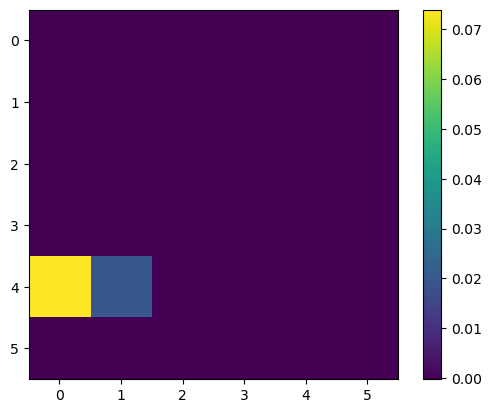

In [167]:
np.set_printoptions(precision=6, suppress=True)

ele_name = 'bx21'
mat_from_bmad = tao.lat_list(ele_name,'ele.mat6').reshape(6,6)[:6, :6]

name_array = np.array([name.strip().lower() for name in cheetah_output['ele_name']])
index = np.where(name_array == ele_name.lower())[0]

mat_from_cheetah = tracking_segment.bx21.transfer_map(torch.tensor(cheetah_output['energy'][index[0]]))[0][:6,:6].numpy()
mat_gap = mat_from_bmad-mat_from_cheetah
print(f'Transfer matrix for {ele_name} in Bmad:\n', mat_from_bmad)
print(f'Transfer matrix  for {ele_name} in Cheetah:\n', mat_from_cheetah)
print('Gap:\n',mat_gap)
plt.imshow(mat_gap, cmap='viridis', interpolation='none')
plt.colorbar()

In [197]:
mat_from_cheetah = tracking_segment.bx21.transfer_map(torch.tensor(cheetah_output['energy'][index[0]]))[0][:4,:4].numpy()
mat_from_cheetah

/lscratch/zihanzhu/tmp/ipykernel_3525482/2652434820.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mat_from_cheetah = tracking_segment.bx21.transfer_map(torch.tensor(cheetah_output['energy'][index[0]]))[0][:4,:4].numpy()


array([[ 0.999317,  0.549   ,  0.      ,  0.      ],
       [-0.      ,  1.000684,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  1.000053,  0.549125],
       [ 0.      ,  0.      , -0.002299,  0.998685]])

In [73]:
ele_name = 'bc2cbeg'#'bx21'#'bc2cbeg'
mat_from_bmad = tao.lat_list(ele_name,'ele.mat6').reshape(6,6)[:6, :6]

name_array = np.array([name.strip().lower() for name in cheetah_output['ele_name']])
index = np.where(name_array == ele_name.lower())[0]+1

print('Beta_x:', cheetah_output['beta_x'][index[0]])
print('Beta_y:', cheetah_output['beta_y'][index[0]])
print('Alpha_x:', cheetah_output['alpha_x'][index[0]])
print('Alpha_y:', cheetah_output['alpha_y'][index[0]])
print('Beam energy:', cheetah_output['energy'][index[0]])

Beta_x: tensor([397.5759], dtype=torch.float64)
Beta_y: tensor([14.7092], dtype=torch.float64)
Alpha_x: tensor([23.0239], dtype=torch.float64)
Alpha_y: tensor([2.9851], dtype=torch.float64)
Beam energy: tensor([4.4203e+09], dtype=torch.float64)


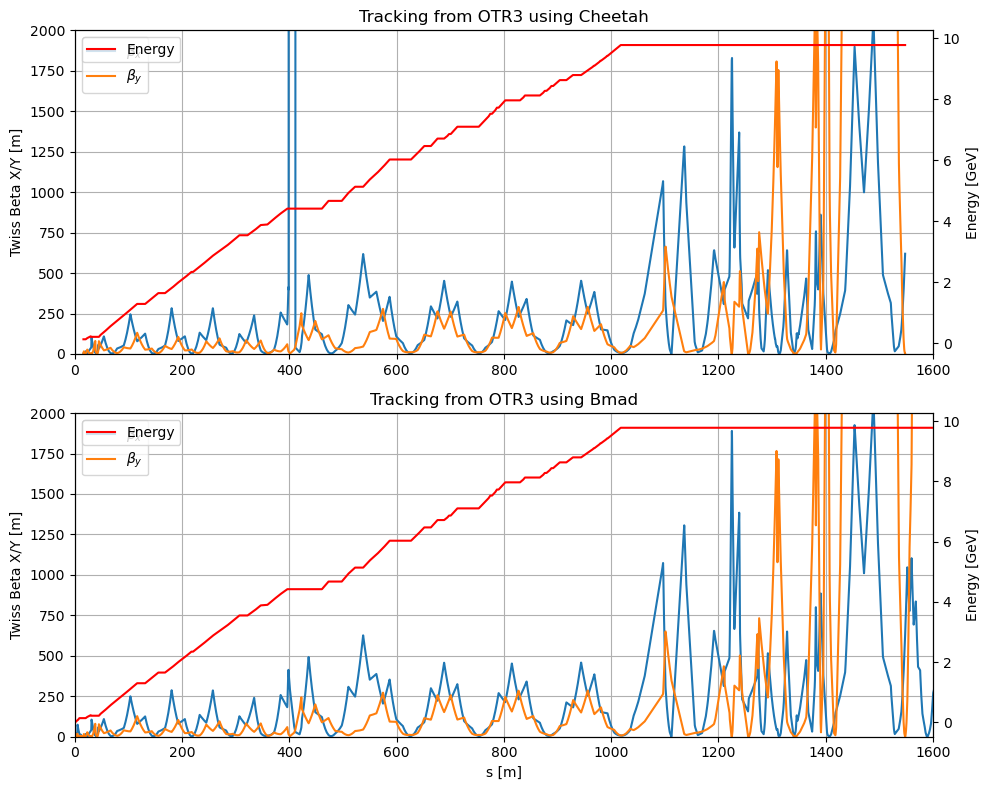

In [194]:
xlims = [0, 1600]
ylims = [0, 2000]

track_start_element_name = track_start_element_name.strip().upper()

# Find Bmad start index
name_array = np.array([name.strip().upper() for name in bmad_output['ele.name']])
bmad_start_index = np.where(name_array == track_start_element_name)[0]

if len(bmad_start_index) == 0:
    raise ValueError(f"Element name '{track_start_element_name}' not found in Bmad output.")

bmad_start_s = bmad_output['ele.s'][bmad_start_index[0]]

s = cheetah_output['s']
cheetah_beta_x = cheetah_output['beta_x']
cheetah_beta_y = cheetah_output['beta_y']
cheetah_energy = cheetah_output['energy']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot Cheetah output on the first axis
ax1.set_title(f'Tracking from {track_start_element_name} using Cheetah')
ax1.plot(s + bmad_start_s, cheetah_beta_x, label=r'$\beta_x$')
ax1.plot(s + bmad_start_s, cheetah_beta_y, label=r'$\beta_y$')
ax1.set_ylabel('Twiss Beta X/Y [m]')
ax1.set_xlim(xlims)
ax1.set_ylim(ylims)
ax1.grid()
ax1.legend()


ax1_energy = ax1.twinx() 
ax1_energy.plot(s + bmad_start_s, np.array(cheetah_energy)*1e-9, color='red', label='Energy')
ax1_energy.set_ylabel('Energy [GeV]')  
ax1_energy.legend(loc='upper left')
# Optionally set limits for the energy y-axis
# ax1_energy.set_ylim(0, 1.5e8)  # Adjust according to your energy values range

# Plot Bmad output
ax2.set_title(f'Tracking from {track_start_element_name} using Bmad')
ax2.set_xlabel('s [m]')
ax2.set_ylabel('Twiss Beta X/Y [m]')
ax2.plot(bmad_output['ele.s'], bmad_output['ele.a.beta'], label=r'$\beta_x$')
ax2.plot(bmad_output['ele.s'], bmad_output['ele.b.beta'], label=r'$\beta_y$')

ax2.set_xlim(xlims)
ax2.set_ylim(ylims)
ax2.grid()
ax2.legend()


ax2_energy = ax2.twinx() 
ax2_energy.plot(bmad_output['ele.s'], bmad_output['ele.e_tot']*1e-9, color='red', label='Energy')
ax2_energy.set_ylabel('Energy [GeV]') 
ax2_energy.legend(loc='upper left')

plt.tight_layout() 
plt.show()

In [193]:
tc('show ele SBend::*', verbose=True)

       102  BXH1                                             9.202
       104  BXH2                                             9.468
       114  BXH3                                            10.424
       116  BXH4                                            10.691
       172  BX01                                            17.397
       185  BX02                                            19.160
       254  BX11                                            31.590
       258  BX12                                            34.239
       266  BX13                                            35.272
       272  BX14                                            37.922
       726  BX21                                           399.262
       730  BX22                                           409.678
       740  BX23                                           411.319
       744  BX24                                           421.735
      1671  BY1                                           1213

/sdf/home/z/zihanzhu/miniconda3/envs/lcls-live/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:712: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


NameError: name 'locations' is not defined

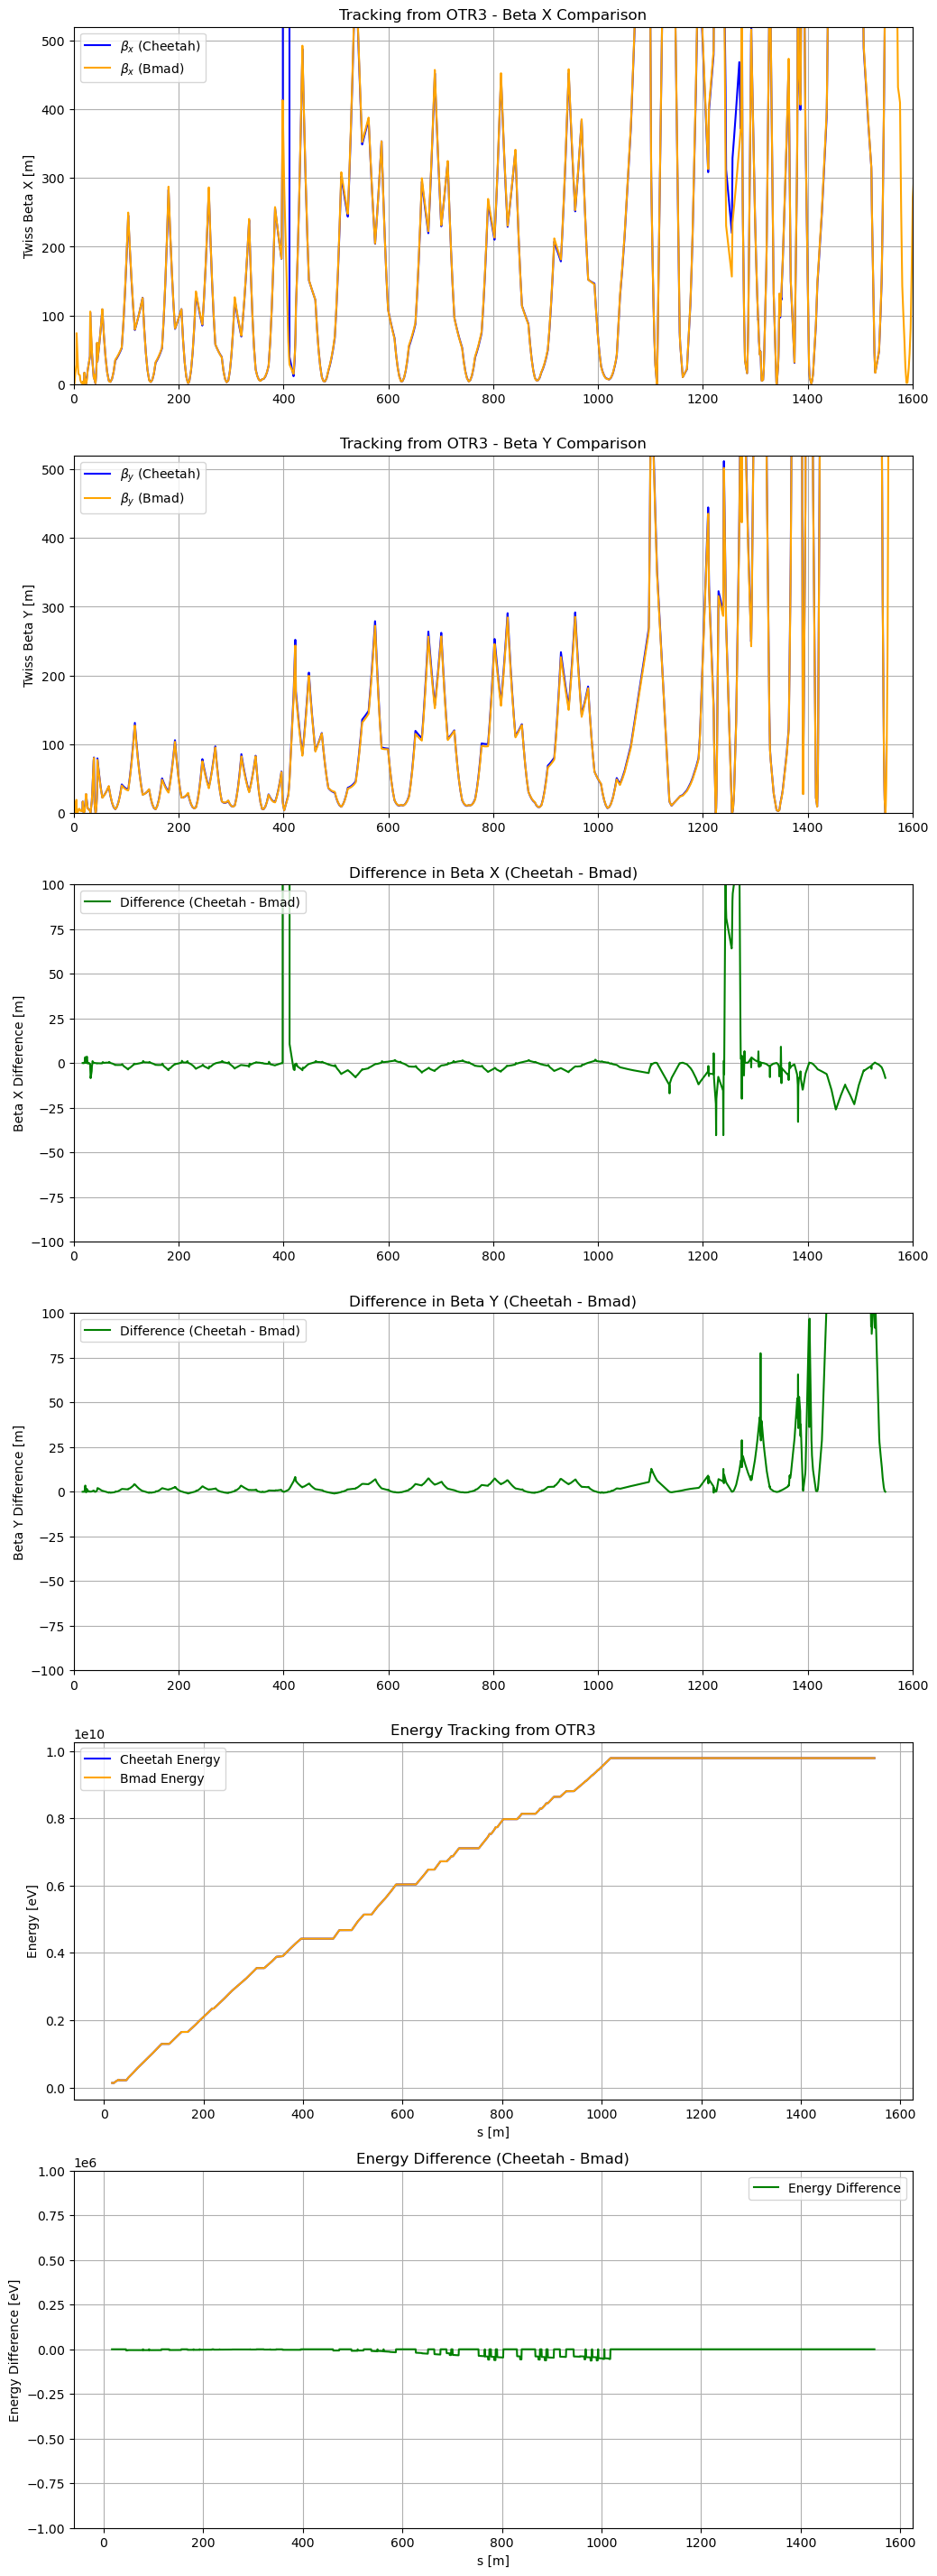

In [191]:
from scipy.interpolate import interp1d

s_np = np.array([tensor.cpu().item() if tensor.numel() == 1 else tensor.cpu().numpy() for tensor in s])  # Positions for Cheetah

# Define common points
common_s = np.linspace(bmad_output['ele.s'][bmad_start_index[0]], bmad_output['ele.s'][bmad_end_index[0]], num=3000)

# Interpolate the beta functions
cheetah_interp_x = interp1d(s_np + bmad_output['ele.s'][bmad_start_index[0]], np.array(cheetah_beta_x).flatten(), kind='linear', fill_value='extrapolate')
bmad_interp_x = interp1d(bmad_output['ele.s'], bmad_output['ele.a.beta'], kind='linear', fill_value='extrapolate')

cheetah_interp_y = interp1d(s_np + bmad_output['ele.s'][bmad_start_index[0]], np.array(cheetah_beta_y).flatten(), kind='linear', fill_value='extrapolate')
bmad_interp_y = interp1d(bmad_output['ele.s'], bmad_output['ele.b.beta'], kind='linear', fill_value='extrapolate')

# Interpolate the energy values
cheetah_interp_energy = interp1d(s_np + bmad_output['ele.s'][bmad_start_index[0]], np.array(cheetah_energy).flatten(), kind='linear', fill_value='extrapolate')
bmad_interp_energy = interp1d(bmad_output['ele.s'], bmad_output['ele.e_tot'], kind='linear', fill_value='extrapolate')

# Calculate the difference at common points
difference_x = cheetah_interp_x(common_s) - bmad_interp_x(common_s)
difference_y = cheetah_interp_y(common_s) - bmad_interp_y(common_s)

# Calculate energy differences
difference_energy = cheetah_interp_energy(common_s) - bmad_interp_energy(common_s)

# Set limits for plots
ylims_gap = [-100, 100]
energy_ylim_gap = [-1e6, 1e6] 


fig, axs = plt.subplots(6, 1, figsize=(12, 36))

# Plot beta_x
axs[0].set_title(f'Tracking from {track_start_element_name} - Beta X Comparison')
axs[0].plot(s + bmad_start_s, cheetah_beta_x, label=r'$\beta_x$ (Cheetah)', color='blue')
axs[0].plot(bmad_output['ele.s'], bmad_output['ele.a.beta'], label=r'$\beta_x$ (Bmad)', color='orange')
axs[0].set_xlim(xlims)
axs[0].set_ylim([0,520])
axs[0].set_ylabel('Twiss Beta X [m]')
axs[0].grid()
axs[0].legend()

# Plot beta_y
axs[1].set_title(f'Tracking from {track_start_element_name} - Beta Y Comparison')
axs[1].plot(s + bmad_start_s, cheetah_beta_y, label=r'$\beta_y$ (Cheetah)', color='blue')
axs[1].plot(bmad_output['ele.s'], bmad_output['ele.b.beta'], label=r'$\beta_y$ (Bmad)', color='orange')
axs[1].set_xlim(xlims)
axs[1].set_ylim([0,520])
axs[1].set_ylabel('Twiss Beta Y [m]')
axs[1].grid()
axs[1].legend()

# Plot difference in beta_x
axs[2].set_title(f'Difference in Beta X (Cheetah - Bmad)')
axs[2].plot(common_s, difference_x, label='Difference (Cheetah - Bmad)', color='green')
axs[2].set_xlim(xlims)
axs[2].set_ylabel('Beta X Difference [m]')
axs[2].set_ylim(ylims_gap)
axs[2].grid()
axs[2].legend()

# Plot difference in beta_y
axs[3].set_title(f'Difference in Beta Y (Cheetah - Bmad)')
axs[3].plot(common_s, difference_y, label='Difference (Cheetah - Bmad)', color='green')
axs[3].set_xlim(xlims)
axs[3].set_ylabel('Beta Y Difference [m]')
axs[3].set_ylim(ylims_gap)
axs[3].grid()
axs[3].legend()

# Plot energy comparison
axs[4].set_title(f'Energy Tracking from {track_start_element_name}')
axs[4].plot(common_s, cheetah_interp_energy(common_s), label='Cheetah Energy', color='blue')
axs[4].plot(common_s, bmad_interp_energy(common_s), label='Bmad Energy', color='orange')
# axs[4].set_xlim(xlims)
axs[4].set_xlabel('s [m]')
axs[4].set_ylabel('Energy [eV]')
axs[4].grid()
axs[4].legend()

# Plot the difference in energy
axs[5].set_title('Energy Difference (Cheetah - Bmad)')
axs[5].plot(common_s, difference_energy, label='Energy Difference', color='green')
# axs[5].set_xlim(xlims)
axs[5].set_xlabel('s [m]')
axs[5].set_ylabel('Energy Difference [eV]')
axs[5].set_ylim(energy_ylim_gap)
axs[5].grid()
axs[5].legend()


for element, location in locations:
    if location is not None:
        axs[0].axvline(x=location, color='red', linestyle='--', linewidth=1)
        axs[0].text(location, axs[0].get_ylim()[1] * 0.9, element, rotation=90, verticalalignment='top', color='red')
        axs[3].axvline(x=location, color='red', linestyle='--', linewidth=1)
        axs[3].text(location, axs[3].get_ylim()[1] * 0.9, element, rotation=90, verticalalignment='top', color='red')

plt.tight_layout()
plt.show()

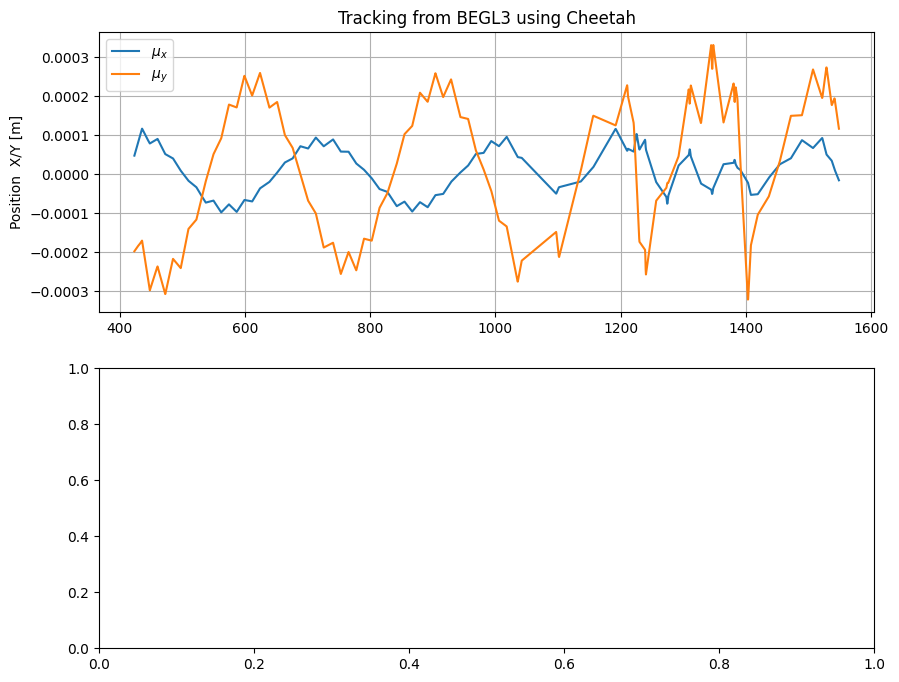

In [26]:
# xlims = [1200, 1600]
# ylims = [0,150]

track_start_element_name = track_start_element_name.strip().upper()

# Find Bmad start index
name_array = np.array([name.strip().upper() for name in bmad_output['ele.name']])
bmad_start_index = np.where(name_array == track_start_element_name)[0]

if len(bmad_start_index) == 0:
    raise ValueError(f"Element name '{track_start_element_name}' not found in Bmad output.")

bmad_start_s = bmad_output['ele.s'][bmad_start_index[0]]

s = cheetah_output['s']
cheetah_mu_x = cheetah_output['mu_x']
cheetah_mu_y = cheetah_output['mu_y']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))  

# Plot Cheetah output
ax1.set_title(f'Tracking from {track_start_element_name} using Cheetah')
ax1.plot(s + bmad_start_s, cheetah_mu_x, label=r'$\mu_x$')
ax1.plot(s + bmad_start_s, cheetah_mu_y, label=r'$\mu_y$')
ax1.set_ylabel('Position  X/Y [m]')


ax1.grid()
ax1.legend()